In [ ]:
%pip install numpy pandas scikit-learn matplotlib

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

## Classification with Logistic Regression

### Scenario
Assume that you are working for a telecommunications company which is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is more likely to leave the company.


###  Load the Telco Churn data 
Telco Churn is a hypothetical data file that concerns a telecommunications company's efforts to reduce turnover in its customer base. Each case corresponds to a separate customer and it records various demographic and service usage information. Before you can work with the data, you must use the URL to get the ChurnData.csv.

### About the dataset
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 
<br><br>
This data set provides you information about customer preferences, services opted, personal details, etc. which helps you predict customer churn.

In [3]:
# Load data
url_dataset = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url_dataset)

churn_df.sample(5)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
83,10.0,33.0,2.0,66.0,3.0,9.0,0.0,1.0,0.0,7.10,...,0.0,1.0,0.0,0.0,0.0,1.960,3.056,4.190,1.0,1.0
125,72.0,75.0,48.0,14.0,2.0,6.0,0.0,1.0,0.0,37.30,...,0.0,0.0,0.0,0.0,0.0,3.619,3.240,2.639,2.0,0.0
13,69.0,51.0,11.0,438.0,4.0,23.0,1.0,1.0,0.0,29.00,...,1.0,1.0,0.0,1.0,0.0,3.367,3.240,6.082,4.0,0.0
144,45.0,27.0,3.0,39.0,3.0,2.0,0.0,0.0,0.0,13.45,...,0.0,0.0,0.0,0.0,0.0,2.599,3.240,3.664,2.0,0.0
193,61.0,52.0,21.0,82.0,1.0,18.0,0.0,1.0,0.0,12.10,...,0.0,0.0,0.0,1.0,0.0,2.493,3.240,4.407,3.0,0.0


In [5]:
# Data Preprocessing
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.sample(3)

,tenure,age,address,income,ed,employ,equip,churn
94,55.0,52.0,22.0,127.0,1.0,28.0,0.0,0
140,8.0,42.0,2.0,129.0,4.0,17.0,0.0,0
84,26.0,30.0,9.0,18.0,4.0,1.0,0.0,1


In [6]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [7]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

It is also a norm to standardize or normalize the dataset in order to have all the features at the same scale. This helps the model learn faster and improves the model performance. We may make use of StandardScalar function in the Scikit-Learn library.

In [8]:
X_norm = StandardScaler().fit(X).transform(X)
X_norm[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

### Splitting the dataset

The trained model has to be tested and evaluated on data which has not been used during training. Therefore, it is required to separate a part of the data for testing and the remaining for training. For this, we may make use of the train_test_split function in the scikit-learn library.

In [9]:
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)

## Logistic Regression Classifier modeling


In [10]:
LR = LogisticRegression().fit(X_train,y_train)

yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

To understand this prediction, we can also have a look at the prediction probability of data point of the test data set. Use the function __predict_proba__ , we can get the probability of each class. The first column is the probability of the record belonging to class 0, and second column that of class 1. Note that the class prediction system uses the threshold for class prediction as 0.5. This means that the class predicted is the one which is most likely.

In [ ]:
# Column 0: probability of the record to belonging to class A (0)
# Column 1: probability of the record to belonging to class B (1)
# > 0.5, belong to that class
yhat_prob = LR.predict_proba(X_test)
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

Since the purpose here is to predict the 1 class more acccurately, you can also examine what role each input feature has to play in the prediction of the 1 class. Consider the code below.


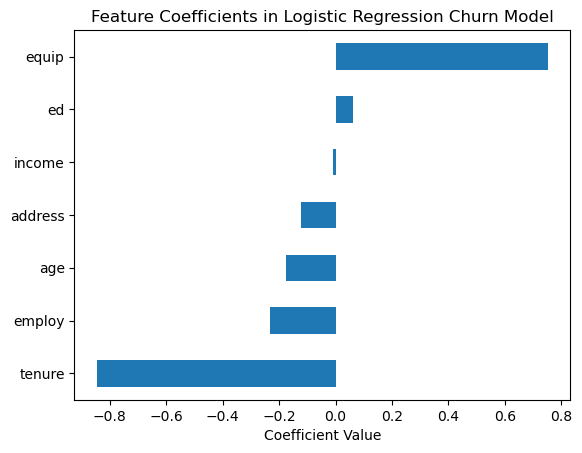

In [12]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1]) # all features
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

Large positive value of LR Coefficient for a given field indicates that increase in this parameter will lead to better chance of a positive, i.e. 1 class. A large negative value indicates the opposite, which means that an increase in this parameter will lead to poorer chance of a positive class. A lower absolute value indicates weaker affect of the change in that field on the predicted class. Let us examine this with the following exercises.  


## Performance Evaluation
Once the predictions have been generated, it becomes prudent to evaluate the performance of the model in predicting the target variable. Let us evaluate the log-loss value.

### log loss

Log loss (Logarithmic loss), also known as Binary Cross entropy loss, is a function that generates a loss value based on the class wise prediction probabilities and the actual class labels. **The lower the log loss value, the better the model is considered to be.**

In [13]:
log_loss(y_test, yhat_prob)

0.6257718410257236

## Practice Exercise

What happens to the log loss if we remove the feature 'equip' from the original set of input features?

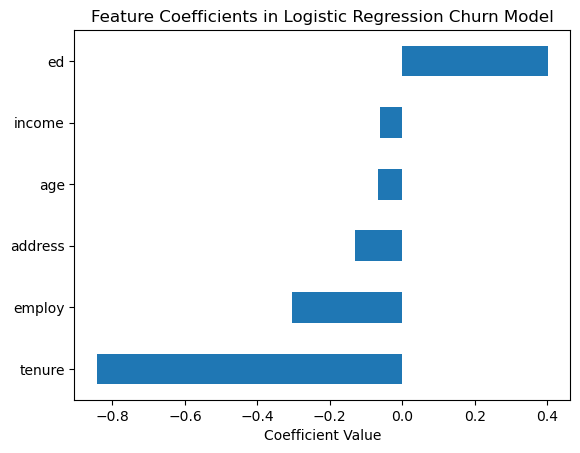

In [18]:
# Data Preprocessing
churn_df = pd.read_csv(url_dataset)
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
# Select variables
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ']])
y = np.asarray(churn_df['churn'])
# standardize
X_norm = StandardScaler().fit(X).transform(X)

# split
X_train, X_test, y_train, y_test = train_test_split( X_norm, y, test_size=0.2, random_state=4)
# train model
LR = LogisticRegression().fit(X_train,y_train)
# predict
yhat = LR.predict(X_test)
# prediction probabilities
yhat_prob = LR.predict_proba(X_test)
# visualize role of each input feature
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1]) # all features
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()


In [ ]:
#log loss - lower than the previous model
log_loss(y_test, yhat_prob)

0.5302427350245369